## Imports und Weissemodell

In [54]:
import modelbase
import modelbase.ratelaws as rl
from weisse import WeisseBaseModel, defaultParameters

import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as spo
import seaborn as sns
import pandas as pd


In [42]:
cl = ['si','a','mr','mt','mm','mq', 'cr','ct','cm','cq','pr','pt','pm','pq']

# Verminderung des ns Werts systematisch 
## wertveränderung von 
- gammamax(1260), 
- vt(726)
-  raten

In [43]:
vr = sneu.getRate('vr').tolist()
vt = sneu.getRate('vt').tolist()
vm = sneu.getRate('vm').tolist()
vq = sneu.getRate('vq').tolist()

# Make data
data = pd.DataFrame({'group_A':vr[0:3], 'group_B':vt[0:3], 'group_C':vm[0:3], 'group_D':vq[0:3]}, index=lambdawertgammamax[0:3])
 
# We need to transform the data from raw data to percentage (fraction)
data_perc = data.divide(data.sum(axis=1), axis=0)
 
# Make the plot
plt.stackplot(lambdawert[0:3],  data_perc["group_A"],  data_perc["group_B"],  data_perc["group_C"], data_perc["group_D"], labels=['vr','vt','vm','vq'])
plt.legend(loc='upper left')
plt.margins(0,0)
plt.title('100 % stacked area chart')
plt.show()

0.2
0.4
0.6
0.8
1.0
1.2
1.4
1.5999999999999999
1.7999999999999998
1.9999999999999998
2.1999999999999997
2.4
2.6
2.8
3.0
3.1999999999999997
3.4
3.6
3.8
4.0
4.199999999999999
4.3999999999999995
4.6
4.8
5.0
5.2
5.3999999999999995
5.6
5.8
6.0
6.199999999999999
6.3999999999999995
6.6
6.8
7.0
7.199999999999999
7.3999999999999995
7.6
7.8
8.0


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/integrate/_ode.py:1348: UserWarning: lsoda: Excess work done on this call (perhaps wrong Dfun type).
  self.messages.get(istate, unexpected_istate_msg)))


[0.006189105818873595,
 0.00979731775924511,
 0.012429596836072386,
 0.01450109234294299,
 0.016215469287182066,
 0.017684563865156017,
 0.018974534371143388,
 0.020127006101380573,
 0.02116960769624672,
 0.022121559430804575,
 0.0229967938509918,
 0.02380577687144056,
 0.024556612562592634,
 0.025255737527554032,
 0.025908372181903914,
 0.026518823829034963,
 0.02709069710994078,
 0.027627045344815943,
 0.028130483515173357,
 0.028603275998209693,
 0.029047407406469033,
 0.029464641755617742,
 0.02985657299195438,
 0.030224668308950927,
 0.030570304536706196,
 0.0308947971981203,
 0.03119942163128392,
 0.031485425871709,
 0.03175403565272616,
 0.032006452688073686]

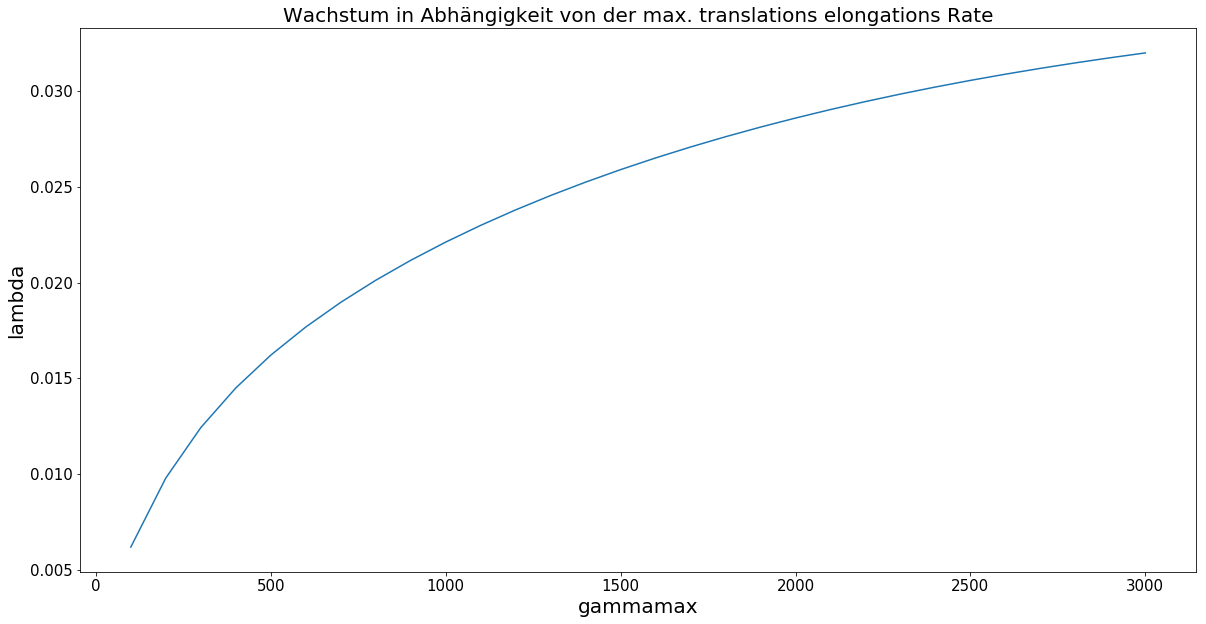

In [55]:
lambdawertgammamax = []

m= WeisseBaseModel()
s = modelbase.Simulator(m)

i = 1
gammamax = 100

while i <= 30:
    m.par.update({'gammamax': gammamax})
    #                         ['si',       'a',     'mr',     'mt',   'mm',    'mq',    'cr', 'ct', 'cm', 'cq', 'pr',   'pt',    'pm',     'pq']
    weise_values = np.array([31096.192, 43297.502, 8514.558, 49.333, 49.333, 8811.960, 348.675, 0, 357.898, 0, 0.0414, 471.364, 471.364 , 471.364])  
    s.timeCourse(np.linspace(0,3000,100),weise_values)
    lambdawertgammamax.append(s.getY()[:,16][-1])
    
    i += 1
    gammamax += 100

    
x = range(100,3001,100)#[200,400,600,800,1000,1200,1400,1600,1800,2000]
y = lambdawertgammamax
plt.figure(figsize=(20,10))
plt.title('Wachstum in Abhängigkeit von der max. translations elongations Rate', size = 20)
plt.xlabel('gammamax', size = 20)
plt.ylabel('lambda', size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)

plt.plot(x,y)

#letzter lambdawert bei unterschiedlichen gammamax
lambdawertgammamax

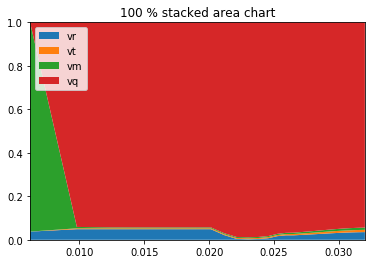

In [57]:
vr = s.getRate('vr').tolist()
vt = s.getRate('vt').tolist()
vm = s.getRate('vm').tolist()
vq = s.getRate('vq').tolist()

# Make data
data = pd.DataFrame({'group_A':vr[0:30], 'group_B':vt[0:30], 'group_C':vm[0:30], 'group_D':vq[0:30]}, index=lambdawertgammamax)
 
# We need to transform the data from raw data to percentage (fraction)
data_perc = data.divide(data.sum(axis=1), axis=0)
 
# Make the plot
plt.stackplot(lambdawertgammamax,  data_perc["group_A"],  data_perc["group_B"],  data_perc["group_C"], data_perc["group_D"], labels=['vr','vt','vm','vq'])
plt.legend(loc='upper left')
plt.margins(0,0)
plt.title('100 % stacked area chart')
plt.show()

[0.0019941476801138185,
 0.008988563628996598,
 0.012515919607397185,
 0.01569134261595545,
 0.01858050257705432,
 0.021226338672696316,
 0.023661057610630736,
 0.02591060395419767,
 0.02799665884755177,
 0.02993768743892258,
 0.031749576848393045,
 0.03344607751025642,
 0.03503913759885299,
 0.03653917103907899,
 0.03795527904171836,
 0.03929543617067964,
 0.04056664786893881,
 0.041775084353967096,
 0.04292619467447956,
 0.044024804006870075,
 0.04507519675428561,
 0.0460811876059001,
 0.04704618238002057,
 0.047973230193945345,
 0.04886506826584287,
 0.049724160452511795,
 0.0505527304563958,
 0.05135279049113177,
 0.05212616607328233,
 0.05287451750536152]

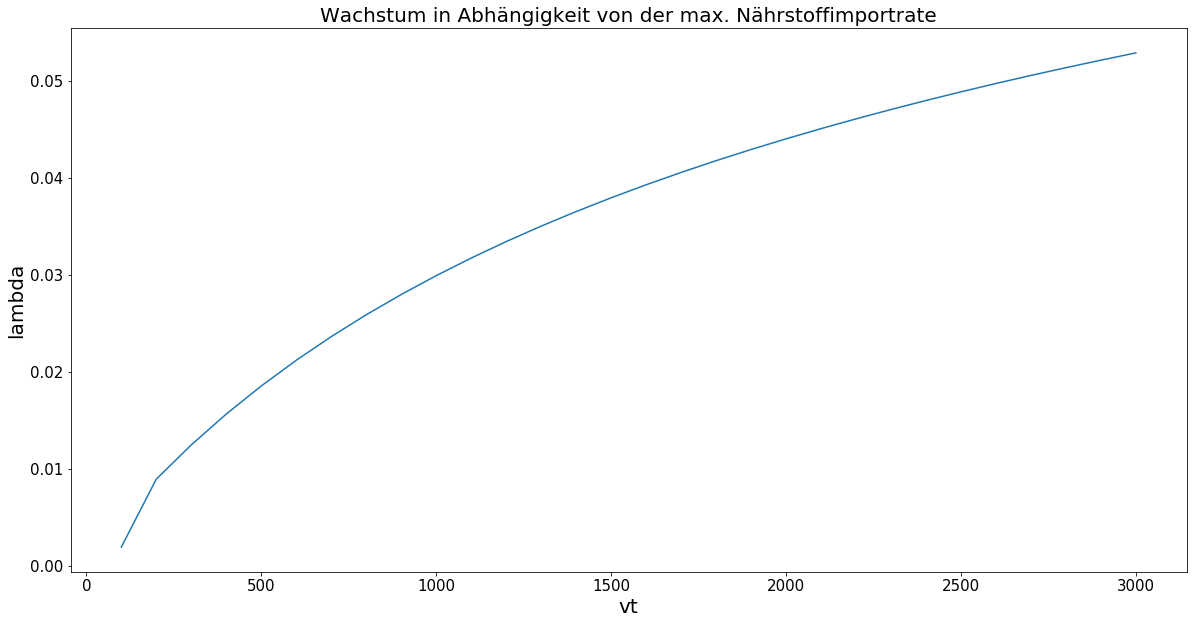

In [58]:
lambdawertvt = []

m= WeisseBaseModel()
s = modelbase.Simulator(m)

i = 1
vt = 100

while i <= 30:
    m.par.update({'vt': vt})
    #                         ['si',       'a',     'mr',     'mt',   'mm',    'mq',    'cr', 'ct', 'cm', 'cq', 'pr',   'pt',    'pm',     'pq']
    weise_values = np.array([31096.192, 43297.502, 8514.558, 49.333, 49.333, 8811.960, 348.675, 0, 357.898, 0, 0.0414, 471.364, 471.364 , 471.364])  
    s.timeCourse(np.linspace(0,3000,100),weise_values)
    lambdawertvt.append(s.getY()[:,16][-1])
    
    i += 1
    vt += 100

    
x = range(100,3001,100)#[200,400,600,800,1000,1200,1400,1600]
y = lambdawertvt
plt.figure(figsize=(20,10))
plt.title('Wachstum in Abhängigkeit von der max. Nährstoffimportrate', size = 20)
plt.xlabel('vt', size = 20)
plt.ylabel('lambda', size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)

plt.plot(x,y)

lambdawertvt


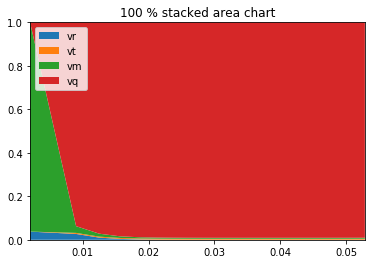

In [59]:
vr = s.getRate('vr').tolist()
vt = s.getRate('vt').tolist()
vm = s.getRate('vm').tolist()
vq = s.getRate('vq').tolist()

# Make data
data = pd.DataFrame({'group_A':vr[0:30], 'group_B':vt[0:30], 'group_C':vm[0:30], 'group_D':vq[0:30]}, index=lambdawertvt)
 
# We need to transform the data from raw data to percentage (fraction)
data_perc = data.divide(data.sum(axis=1), axis=0)
 
# Make the plot
plt.stackplot(lambdawertvt,  data_perc["group_A"],  data_perc["group_B"],  data_perc["group_C"], data_perc["group_D"], labels=['vr','vt','vm','vq'])
plt.legend(loc='upper left')
plt.margins(0,0)
plt.title('100 % stacked area chart')
plt.show()

[0.019931421814964195,
 0.02426266203563834,
 0.02426275811998688,
 0.024262782500469253,
 0.024262793630769178,
 0.02426280000454976,
 0.024262804134048264,
 0.02426280702717289,
 0.024262809166881106,
 0.02426281081356986,
 0.024262812120034172,
 0.02426281318184254,
 0.02426281406183466,
 0.024262814803026885,
 0.02426281543585774]

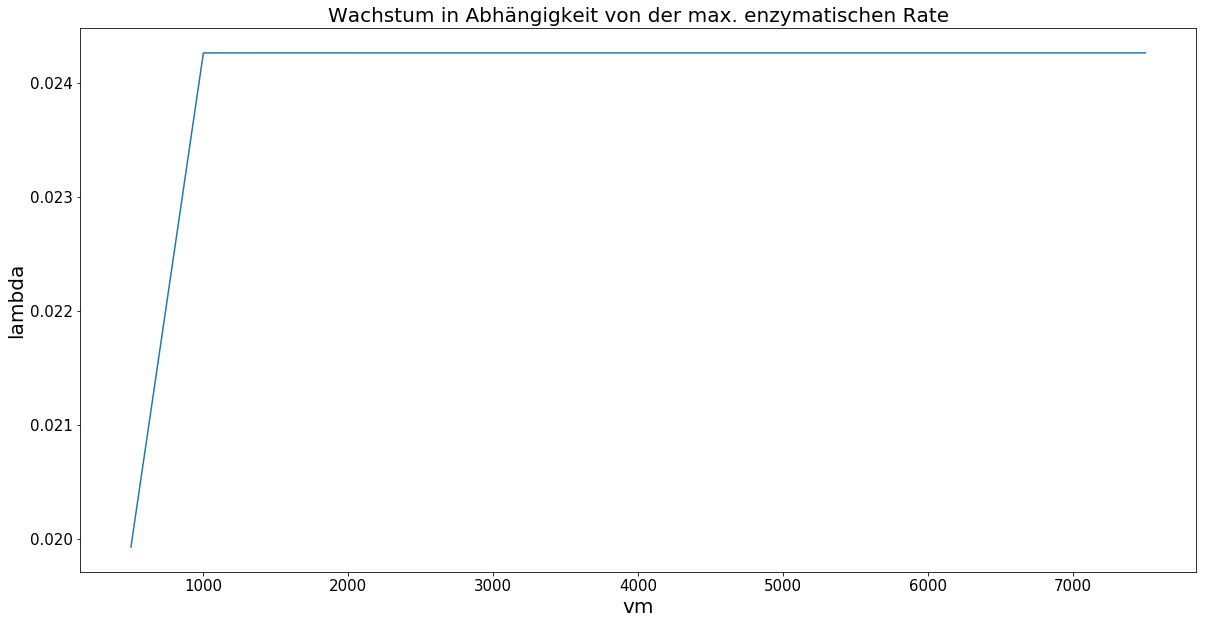

In [60]:
lambdawertvm = []

m= WeisseBaseModel()
s = modelbase.Simulator(m)

i = 1
vm = 500

while i <= 15:
    m.par.update({'vm': vm})
    #                         ['si',       'a',     'mr',     'mt',   'mm',    'mq',    'cr', 'ct', 'cm', 'cq', 'pr',   'pt',    'pm',     'pq']
    weise_values = np.array([31096.192, 43297.502, 8514.558, 49.333, 49.333, 8811.960, 348.675, 0, 357.898, 0, 0.0414, 471.364, 471.364 , 471.364])  
    s.timeCourse(np.linspace(0,3000,100),weise_values)
    lambdawertvm.append(s.getY()[:,16][-1])
    
    i += 1
    vm += 500

    
x = range(500,7501,500)#[200,400,600,800,1000,1200,1400,1600]
y = lambdawertvm
plt.figure(figsize=(20,10))
plt.title('Wachstum in Abhängigkeit von der max. enzymatischen Rate', size = 20)
plt.xlabel('vm', size = 20)
plt.ylabel('lambda', size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)

plt.plot(x,y)

lambdawertvm


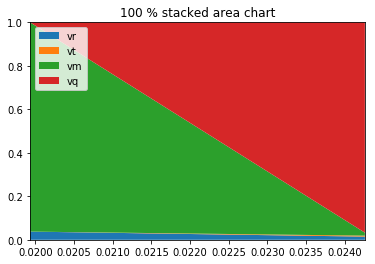

In [61]:
vr = s.getRate('vr').tolist()
vt = s.getRate('vt').tolist()
vm = s.getRate('vm').tolist()
vq = s.getRate('vq').tolist()

# Make data
data = pd.DataFrame({'group_A':vr[0:15], 'group_B':vt[0:15], 'group_C':vm[0:15], 'group_D':vq[0:15]}, index=lambdawertvm)
 
# We need to transform the data from raw data to percentage (fraction)
data_perc = data.divide(data.sum(axis=1), axis=0)
 
# Make the plot
plt.stackplot(lambdawertvm,  data_perc["group_A"],  data_perc["group_B"],  data_perc["group_C"], data_perc["group_D"], labels=['vr','vt','vm','vq'])
plt.legend(loc='upper left')
plt.margins(0,0)
plt.title('100 % stacked area chart')
plt.show()

[0.03012018379928103,
 0.02908573207246776,
 0.028192242812479194,
 0.02740299407628346,
 0.026694561928016624,
 0.02605096329823317,
 0.02546073938778062,
 0.024915357559594363,
 0.024408270412685847,
 0.023934329820136005]

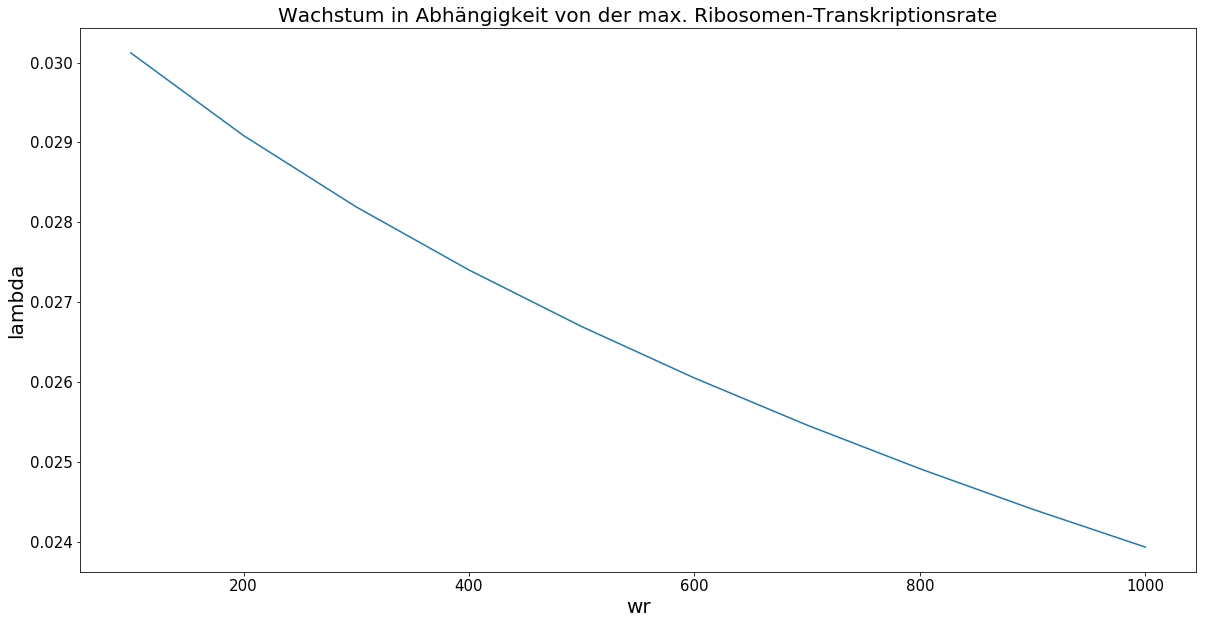

In [62]:
lambdawertwr = []

m= WeisseBaseModel()
s = modelbase.Simulator(m)

i = 1
wr = 100

while i <= 10:
    m.par.update({'wr': wr})
    #                         ['si',       'a',     'mr',     'mt',   'mm',    'mq',    'cr', 'ct', 'cm', 'cq', 'pr',   'pt',    'pm',     'pq']
    weise_values = np.array([31096.192, 43297.502, 8514.558, 49.333, 49.333, 8811.960, 348.675, 0, 357.898, 0, 0.0414, 471.364, 471.364 , 471.364])  
    s.timeCourse(np.linspace(0,3000,100),weise_values)
    lambdawertwr.append(s.getY()[:,16][-1])
    
    i += 1
    wr += 100

    
x = range(100,1001,100)#[200,400,600,800,1000,1200,1400,1600]
y = lambdawertwr
plt.figure(figsize=(20,10))
plt.title('Wachstum in Abhängigkeit von der max. Ribosomen-Transkriptionsrate', size = 20)
plt.xlabel('wr', size = 20)
plt.ylabel('lambda', size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)

plt.plot(x,y)

lambdawertwr


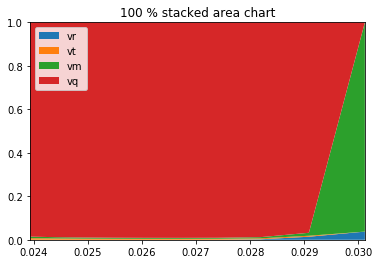

In [63]:
vr = s.getRate('vr').tolist()
vt = s.getRate('vt').tolist()
vm = s.getRate('vm').tolist()
vq = s.getRate('vq').tolist()

# Make data
data = pd.DataFrame({'group_A':vr[0:10], 'group_B':vt[0:10], 'group_C':vm[0:10], 'group_D':vq[0:10]}, index=lambdawertwr)
 
# We need to transform the data from raw data to percentage (fraction)
data_perc = data.divide(data.sum(axis=1), axis=0)
 
# Make the plot
plt.stackplot(lambdawertwr,  data_perc["group_A"],  data_perc["group_B"],  data_perc["group_C"], data_perc["group_D"], labels=['vr','vt','vm','vq'])
plt.legend(loc='upper left')
plt.margins(0,0)
plt.title('100 % stacked area chart')
plt.show()

[0.008656723957345909,
 0.014787015320120474,
 0.019685044045423393,
 0.023746892981393933,
 0.0271977971204181,
 0.03018459797326495,
 0.03280888257713833,
 0.03514357650601113,
 0.037242520158296454,
 0.03914640170178208,
 0.040886596229538184,
 0.042487730199259,
 0.043969439332883435,
 0.04534760094937919,
 0.04663521529879206,
 0.04784304737227918,
 0.04898010205252256,
 0.050053981226931374,
 0.051071155924404914,
 0.05203717634683996]

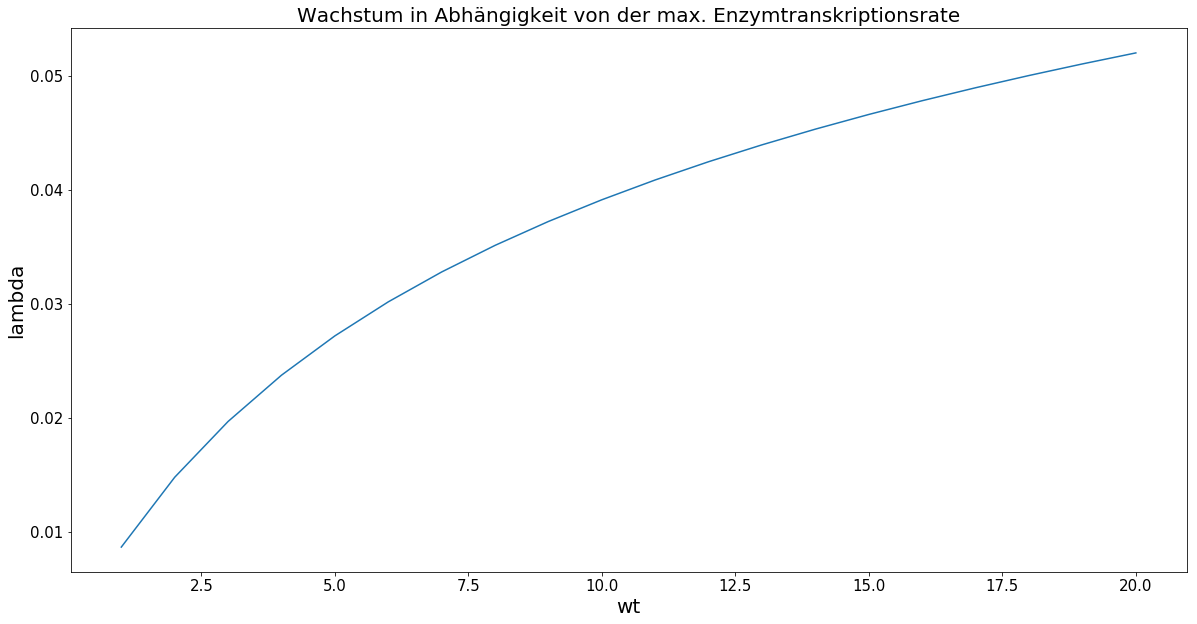

In [64]:
lambdawertwt = []

m= WeisseBaseModel()
s = modelbase.Simulator(m)

i = 1
wt = 1

while i <= 20:
    m.par.update({'wt': wt})
    #                         ['si',       'a',     'mr',     'mt',   'mm',    'mq',    'cr', 'ct', 'cm', 'cq', 'pr',   'pt',    'pm',     'pq']
    weise_values = np.array([31096.192, 43297.502, 8514.558, 49.333, 49.333, 8811.960, 348.675, 0, 357.898, 0, 0.0414, 471.364, 471.364 , 471.364])  
    s.timeCourse(np.linspace(0,3000,100),weise_values)
    lambdawertwt.append(s.getY()[:,16][-1])
    
    i += 1
    wt += 1

    
x = range(1,21,1)#[200,400,600,800,1000,1200,1400,1600]
y = lambdawertwt
plt.figure(figsize=(20,10))
plt.title('Wachstum in Abhängigkeit von der max. Enzymtranskriptionsrate', size = 20)
plt.xlabel('wt', size = 20)
plt.ylabel('lambda', size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)

plt.plot(x,y)

lambdawertwt


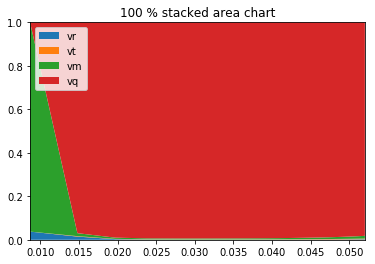

In [65]:
vr = s.getRate('vr').tolist()
vt = s.getRate('vt').tolist()
vm = s.getRate('vm').tolist()
vq = s.getRate('vq').tolist()

# Make data
data = pd.DataFrame({'group_A':vr[0:20], 'group_B':vt[0:20], 'group_C':vm[0:20], 'group_D':vq[0:20]}, index=lambdawertwt)
 
# We need to transform the data from raw data to percentage (fraction)
data_perc = data.divide(data.sum(axis=1), axis=0)
 
# Make the plot
plt.stackplot(lambdawertwt,  data_perc["group_A"],  data_perc["group_B"],  data_perc["group_C"], data_perc["group_D"], labels=['vr','vt','vm','vq'])
plt.legend(loc='upper left')
plt.margins(0,0)
plt.title('100 % stacked area chart')
plt.show()

[0.03417517677740487,
 0.03319287504916262,
 0.032415037561371665,
 0.03167797601249128,
 0.03082138215393592,
 0.02948206523146622,
 0.027800183257914224,
 0.02623548006969471,
 0.024866782472346947,
 0.023673323269076302,
 0.02262552674074145,
 0.0216978223994601,
 0.020869686509174364,
 0.020124849283102736,
 0.01945036743617764]

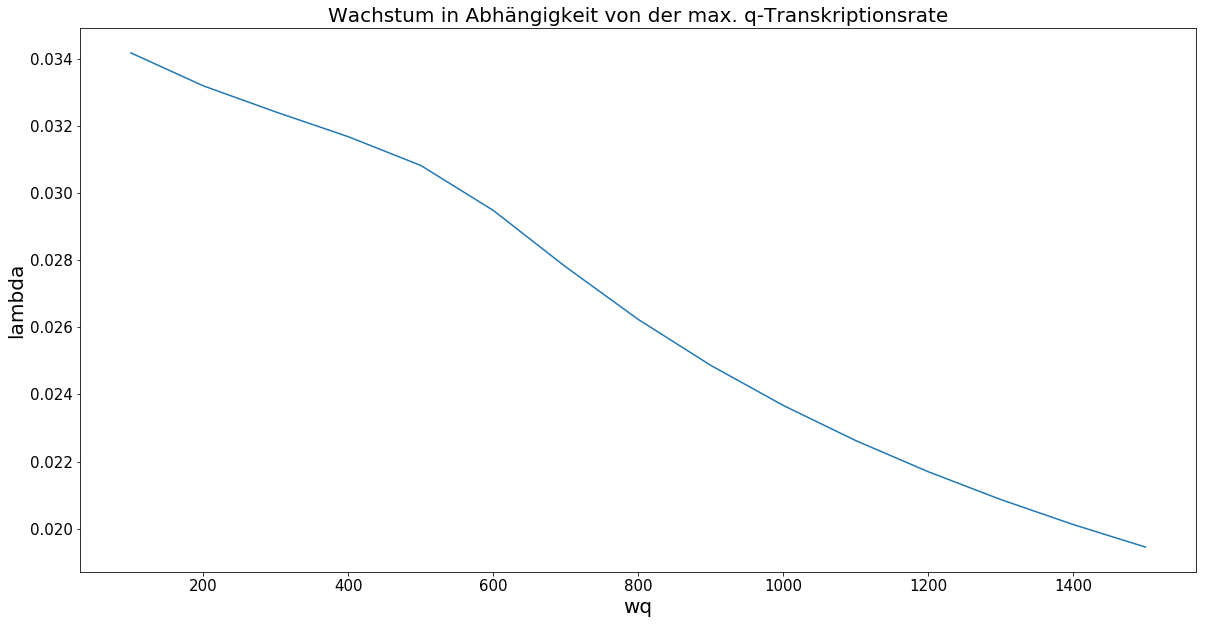

In [66]:
lambdawertwq = []

m= WeisseBaseModel()
s = modelbase.Simulator(m)

i = 1
wq = 100

while i <= 15:
    m.par.update({'wq': wq})
    #                         ['si',       'a',     'mr',     'mt',   'mm',    'mq',    'cr', 'ct', 'cm', 'cq', 'pr',   'pt',    'pm',     'pq']
    weise_values = np.array([31096.192, 43297.502, 8514.558, 49.333, 49.333, 8811.960, 348.675, 0, 357.898, 0, 0.0414, 471.364, 471.364 , 471.364])  
    s.timeCourse(np.linspace(0,3000,100),weise_values)
    lambdawertwq.append(s.getY()[:,16][-1])
    
    i += 1
    wq += 100

    
x = range(100,1501,100)#[200,400,600,800,1000,1200,1400,1600]
y = lambdawertwq
plt.figure(figsize=(20,10))
plt.title('Wachstum in Abhängigkeit von der max. q-Transkriptionsrate', size = 20)
plt.xlabel('wq', size = 20)
plt.ylabel('lambda', size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)

plt.plot(x,y)

lambdawertwq

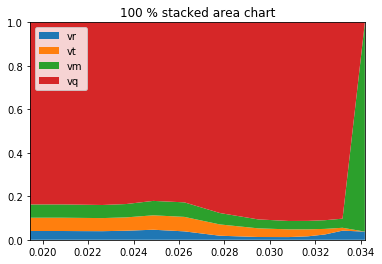

In [67]:
vr = s.getRate('vr').tolist()
vt = s.getRate('vt').tolist()
vm = s.getRate('vm').tolist()
vq = s.getRate('vq').tolist()

# Make data
data = pd.DataFrame({'group_A':vr[0:15], 'group_B':vt[0:15], 'group_C':vm[0:15], 'group_D':vq[0:15]}, index=lambdawertwq)
 
# We need to transform the data from raw data to percentage (fraction)
data_perc = data.divide(data.sum(axis=1), axis=0)
 
# Make the plot
plt.stackplot(lambdawertwq,  data_perc["group_A"],  data_perc["group_B"],  data_perc["group_C"], data_perc["group_D"], labels=['vr','vt','vm','vq'])
plt.legend(loc='upper left')
plt.margins(0,0)
plt.title('100 % stacked area chart')
plt.show()

[0.02391037965380311,
 0.024122938473542254,
 0.02419934179427152,
 0.024238752791845574,
 0.02426281278190851,
 0.02427903172234425,
 0.02429070655548084,
 0.02429951271584948,
 0.024306392001123958,
 0.024311914558195615,
 0.024316445766781814,
 0.02432023060141132,
 0.024323439457539463,
 0.024326194527006798,
 0.024328585718775577,
 0.024330680660326644,
 0.02433253119763398,
 0.02433417774506307,
 0.024335652271613363,
 0.0243369803975019]

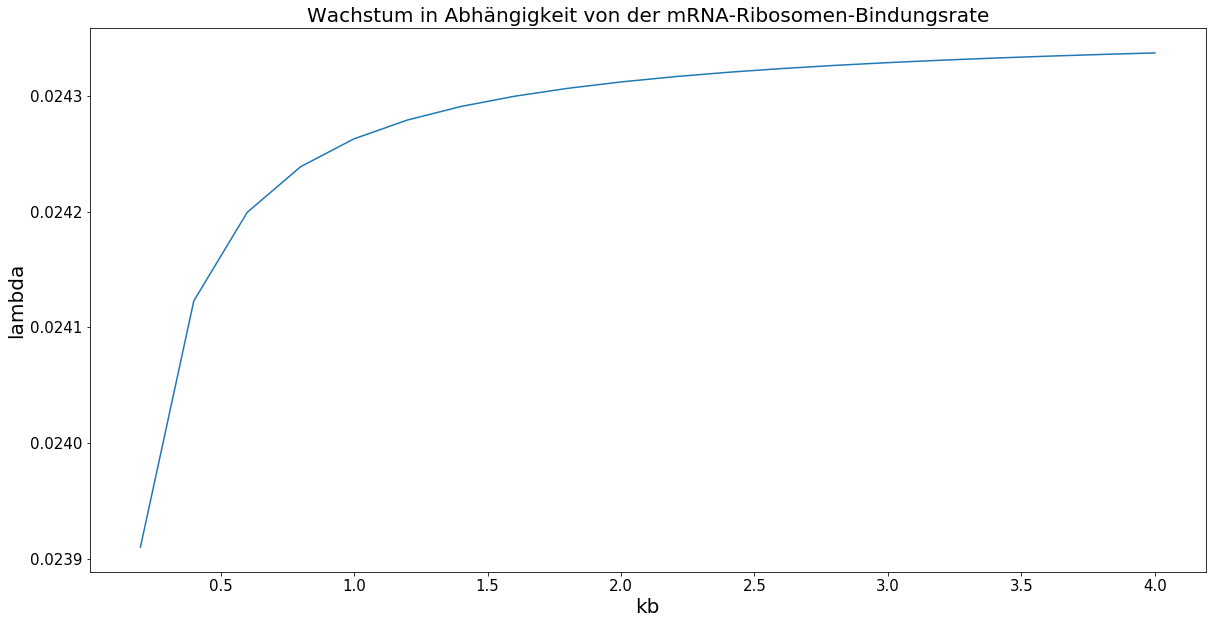

In [68]:
lambdawertkb = []

m= WeisseBaseModel()
s = modelbase.Simulator(m)

i = 1
kb = 0.2

while i <= 20:
    m.par.update({'kb': kb})
    #                         ['si',       'a',     'mr',     'mt',   'mm',    'mq',    'cr', 'ct', 'cm', 'cq', 'pr',   'pt',    'pm',     'pq']
    weise_values = np.array([31096.192, 43297.502, 8514.558, 49.333, 49.333, 8811.960, 348.675, 0, 357.898, 0, 0.0414, 471.364, 471.364 , 471.364])  
    s.timeCourse(np.linspace(0,3000,100),weise_values)
    lambdawertkb.append(s.getY()[:,16][-1])
    
    i += 1
    kb += 0.2

    
x = np.linspace(0.2,4,20)#[200,400,600,800,1000,1200,1400,1600]
y = lambdawertkb
plt.figure(figsize=(20,10))
plt.title('Wachstum in Abhängigkeit von der mRNA-Ribosomen-Bindungsrate', size = 20)
plt.xlabel('kb', size = 20)
plt.ylabel('lambda', size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)

plt.plot(x,y)

lambdawertkb

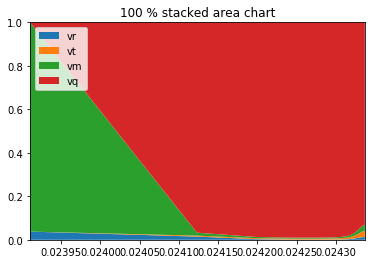

In [69]:
vr = s.getRate('vr').tolist()
vt = s.getRate('vt').tolist()
vm = s.getRate('vm').tolist()
vq = s.getRate('vq').tolist()

# Make data
data = pd.DataFrame({'group_A':vr[0:20], 'group_B':vt[0:20], 'group_C':vm[0:20], 'group_D':vq[0:20]}, index=lambdawertkb)
 
# We need to transform the data from raw data to percentage (fraction)
data_perc = data.divide(data.sum(axis=1), axis=0)
 
# Make the plot
plt.stackplot(lambdawertkb,  data_perc["group_A"],  data_perc["group_B"],  data_perc["group_C"], data_perc["group_D"], labels=['vr','vt','vm','vq'])
plt.legend(loc='upper left')
plt.margins(0,0)
plt.title('100 % stacked area chart')
plt.show()

[0.023714078051708446,
 0.023892458792861202,
 0.024038091185028296,
 0.024159635332852338,
 0.02426281278190851,
 0.024351592825902206,
 0.024428835045846826,
 0.024496662555364132,
 0.024556691020147018,
 0.024610175521468942,
 0.02465810822417899,
 0.024701285342517094,
 0.024740354265868427,
 0.024775847476086483,
 0.02480820744178825,
 0.024837805208295496,
 0.024864954494292383,
 0.024889922528866654,
 0.024912938486151993,
 0.024934200123918237,
 0.024953879061949923,
 0.024972125018099933,
 0.024989069236968597,
 0.025004827286989023,
 0.0250195013589061,
 0.025033182167304848,
 0.02504595053363834,
 0.025057878711834132,
 0.025069031504430496,
 0.02507946720717253,
 0.02508923841229535,
 0.025098392694739177,
 0.025106973200870835,
 0.02511501915560965,
 0.025122566300940136,
 0.02512964727647381,
 0.02513629195085721,
 0.02514252771132043,
 0.02514837971744582,
 0.02515387112423668]

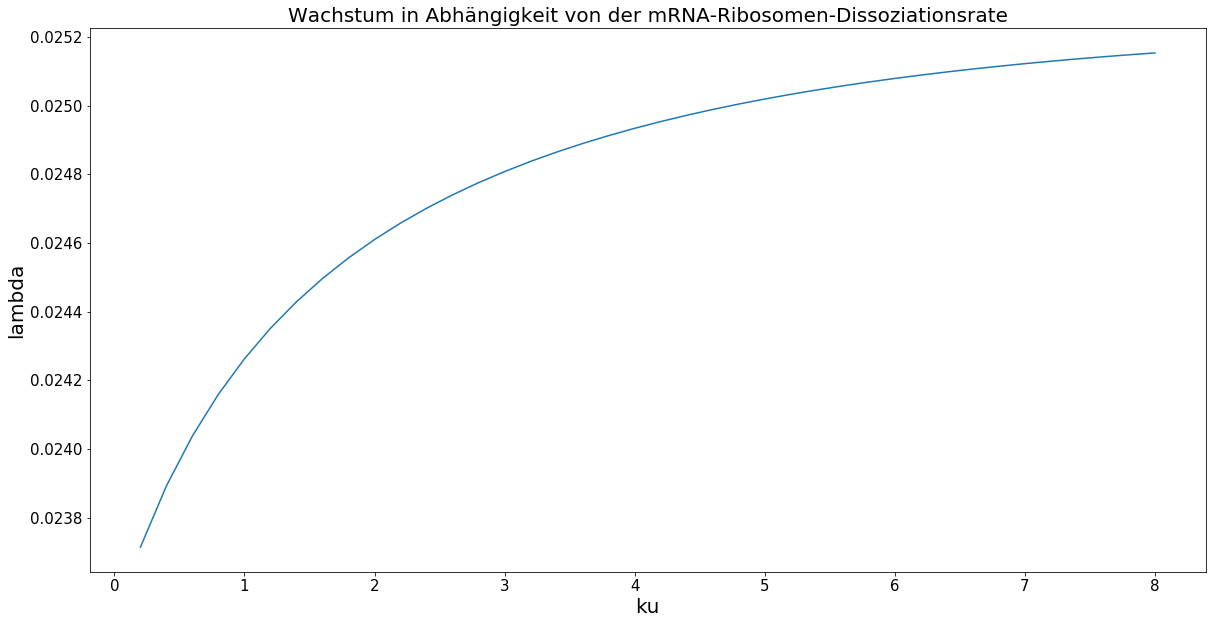

In [70]:
lambdawertku = []

m= WeisseBaseModel()
s = modelbase.Simulator(m)

i = 1
ku = 0.2

while i <= 40:
    m.par.update({'ku': ku})
    #                         ['si',       'a',     'mr',     'mt',   'mm',    'mq',    'cr', 'ct', 'cm', 'cq', 'pr',   'pt',    'pm',     'pq']
    weise_values = np.array([31096.192, 43297.502, 8514.558, 49.333, 49.333, 8811.960, 348.675, 0, 357.898, 0, 0.0414, 471.364, 471.364 , 471.364])  
    s.timeCourse(np.linspace(0,3000,100),weise_values)
    lambdawertku.append(s.getY()[:,16][-1])
    
    i += 1
    ku += 0.2

    
x = np.linspace(0.2,8,40)#[200,400,600,800,1000,1200,1400,1600]
y = lambdawertku
plt.figure(figsize=(20,10))
plt.title('Wachstum in Abhängigkeit von der mRNA-Ribosomen-Dissoziationsrate', size = 20)
plt.xlabel('ku', size = 20)
plt.ylabel('lambda', size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)

plt.plot(x,y)

lambdawertku

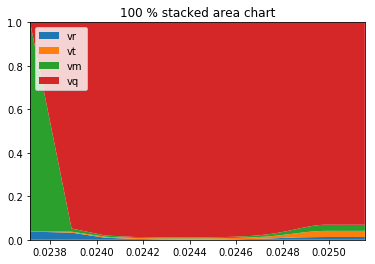

In [72]:
vr = s.getRate('vr').tolist()
vt = s.getRate('vt').tolist()
vm = s.getRate('vm').tolist()
vq = s.getRate('vq').tolist()

# Make data
data = pd.DataFrame({'group_A':vr[0:40], 'group_B':vt[0:40], 'group_C':vm[0:40], 'group_D':vq[0:40]}, index=lambdawertku)
 
# We need to transform the data from raw data to percentage (fraction)
data_perc = data.divide(data.sum(axis=1), axis=0)
 
# Make the plot
plt.stackplot(lambdawertku,  data_perc["group_A"],  data_perc["group_B"],  data_perc["group_C"], data_perc["group_D"], labels=['vr','vt','vm','vq'])
plt.legend(loc='upper left')
plt.margins(0,0)
plt.title('100 % stacked area chart')
plt.show()

[0.024186418597395756,
 0.024042135643951766,
 0.023907538168651703,
 0.02378109475424123,
 0.0236616382074809,
 0.023548254745778922,
 0.023440213093547047,
 0.023336917211710075,
 0.02323787369151401,
 0.023142668608586815,
 0.023050950684400946,
 0.022962418773604058,
 0.022876812391870102,
 0.02279390442728047,
 0.02271349544986676,
 0.022635409210828794,
 0.022559489040882705,
 0.022485594937499513,
 0.022413601186535185,
 0.022343394403103473,
 0.02227487190476553,
 0.022207940350637483,
 0.022142514595149862,
 0.02207851671647852,
 0.02201587518817904,
 0.021954524169045166,
 0.021894402891202612,
 0.02183545513032601,
 0.021777628744897685,
 0.02172087527382241,
 0.021665149583611418,
 0.02161040955787251,
 0.021556615823067428,
 0.021503731505490235,
 0.021451722015231146,
 0.021400554853551024,
 0.021350199440640417,
 0.021300626961186658,
 0.021251810225549866,
 0.02120372354466299]

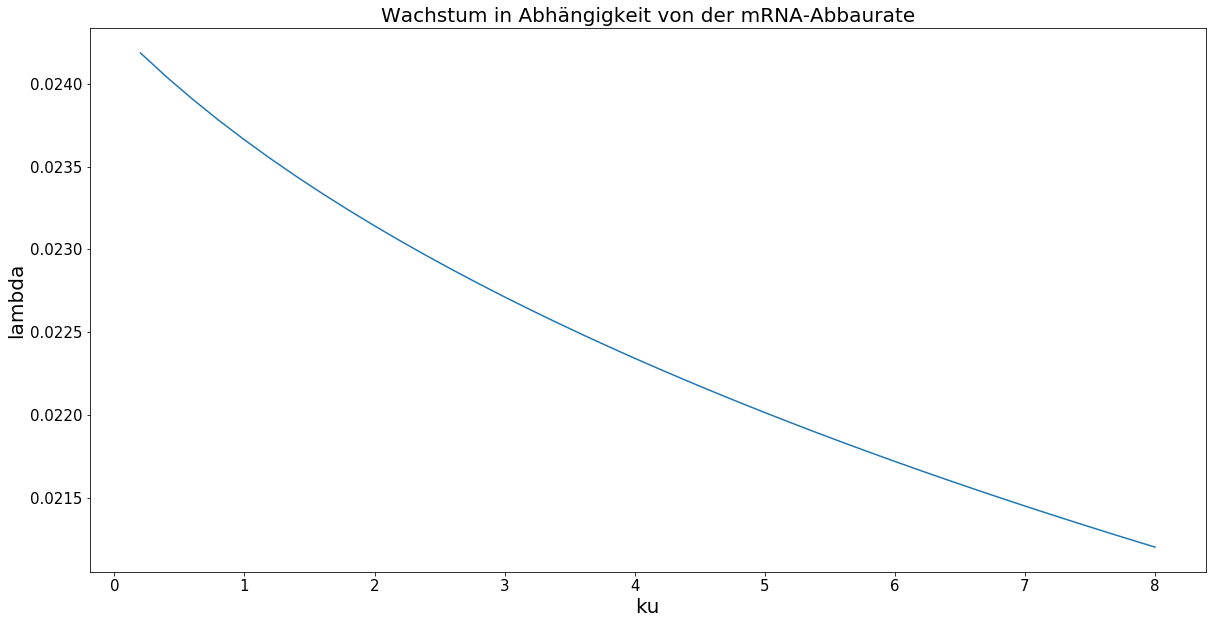

In [73]:
lambdawertdm = []

m= WeisseBaseModel()
s = modelbase.Simulator(m)

i = 1
dm = 0.2

while i <= 40:
    m.par.update({'dm': dm})
    #                         ['si',       'a',     'mr',     'mt',   'mm',    'mq',    'cr', 'ct', 'cm', 'cq', 'pr',   'pt',    'pm',     'pq']
    weise_values = np.array([31096.192, 43297.502, 8514.558, 49.333, 49.333, 8811.960, 348.675, 0, 357.898, 0, 0.0414, 471.364, 471.364 , 471.364])  
    s.timeCourse(np.linspace(0,3000,100),weise_values)
    lambdawertdm.append(s.getY()[:,16][-1])
    
    i += 1
    dm += 0.2

    
x = np.linspace(0.2,8,40)#[200,400,600,800,1000,1200,1400,1600]
y = lambdawertdm
plt.figure(figsize=(20,10))
plt.title('Wachstum in Abhängigkeit von der mRNA-Abbaurate', size = 20)
plt.xlabel('dm', size = 20)
plt.ylabel('lambda', size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)

plt.plot(x,y)

lambdawertdm

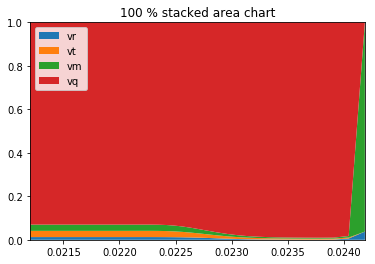

In [74]:
vr = s.getRate('vr').tolist()
vt = s.getRate('vt').tolist()
vm = s.getRate('vm').tolist()
vq = s.getRate('vq').tolist()

# Make data
data = pd.DataFrame({'group_A':vr[0:40], 'group_B':vt[0:40], 'group_C':vm[0:40], 'group_D':vq[0:40]}, index=lambdawertdm)
 
# We need to transform the data from raw data to percentage (fraction)
data_perc = data.divide(data.sum(axis=1), axis=0)
 
# Make the plot
plt.stackplot(lambdawertdm,  data_perc["group_A"],  data_perc["group_B"],  data_perc["group_C"], data_perc["group_D"], labels=['vr','vt','vm','vq'])
plt.legend(loc='upper left')
plt.margins(0,0)
plt.title('100 % stacked area chart')
plt.show()